In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("A:\DATA\Imartics")

In [3]:
diamond_df=pd.read_csv('diamonds.csv')
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:xlabel='price', ylabel='Density'>

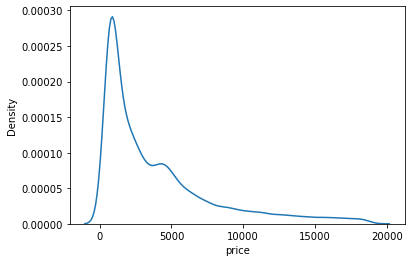

In [5]:
sns.kdeplot(diamond_df.price)

In [6]:
print('The Skewness of the distribution is ',diamond_df.price.kurt())
print('The Kurtosis of the distribution is ',diamond_df.price.skew())

The Skewness of the distribution is  2.17769575924869
The Kurtosis of the distribution is  1.618395283383529


## Observations:

- Since the skewness is greater than 1 there seem to be lot of prices which are extreme values. 
- Even the kurtosis is greater which indicates flatter tails which is clearly a lot to the right.

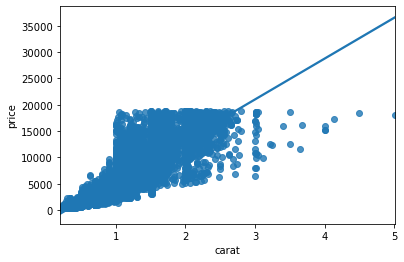

In [7]:
sns.regplot(x=diamond_df.carat,y=diamond_df.price)
plt.show()

##Observations:

- We can see that there exists some relationship between carat and the price of the diamonds.

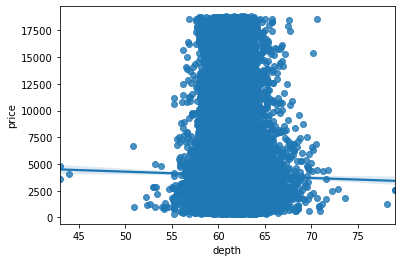

In [8]:
sns.regplot(x=diamond_df.depth,y=diamond_df.price)
plt.show()

## Observations:

- There is not much effect of depth on diamond Price

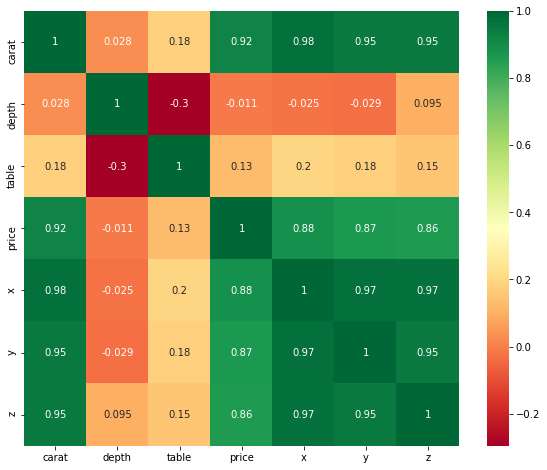

In [9]:
plt.figure(figsize=(10,8))
p=sns.heatmap(diamond_df.corr(), annot=True,cmap='RdYlGn',square=True)

## Observations:

- From the above heatmap we can see that only Carat,x,y,z have good affect on price variable. so let's consider these and build our model.

In [10]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [11]:
print("Number of rows with x == 0: {} ".format((diamond_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamond_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamond_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamond_df.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [12]:
diamond_df[['x','y','z']]=diamond_df[['x','y','z']].replace(0,np.NaN)

In [13]:
diamond_df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

## Treatment of data for missing values

In [14]:
diamond_df.dropna(inplace=True)

In [15]:
diamond_df.shape

(53920, 10)

In [16]:
diamond_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## What to do with the zero's in x,y and z?

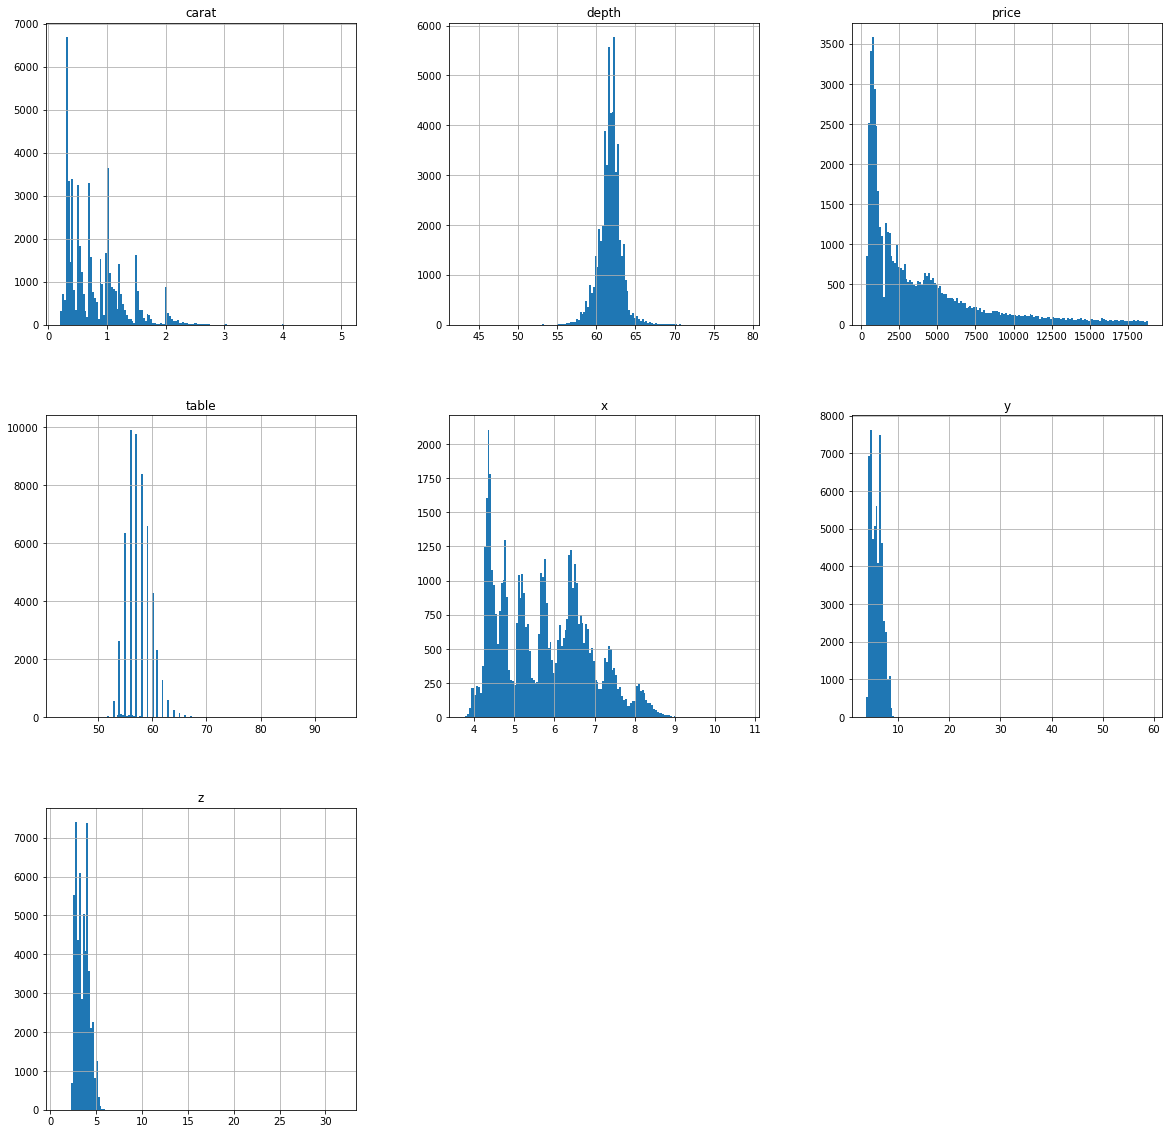

In [17]:
p = diamond_df.hist(figsize = (20,20),bins=150)

## Categorical Data Essense

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


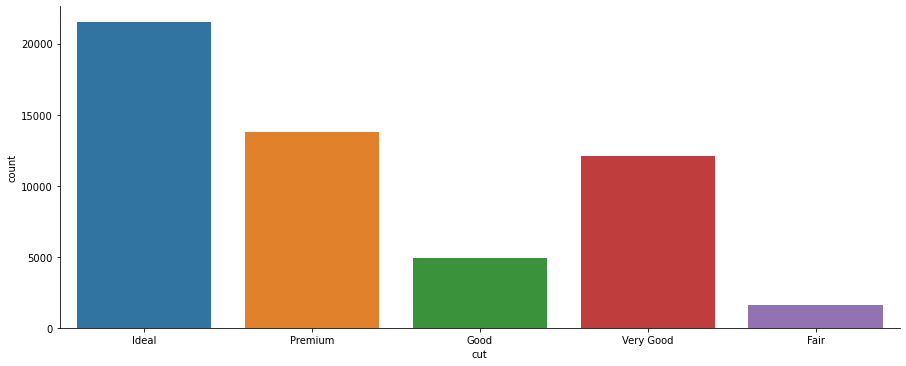

In [18]:
p = sns.factorplot(x='cut', data=diamond_df , kind='count',aspect=2.5 )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


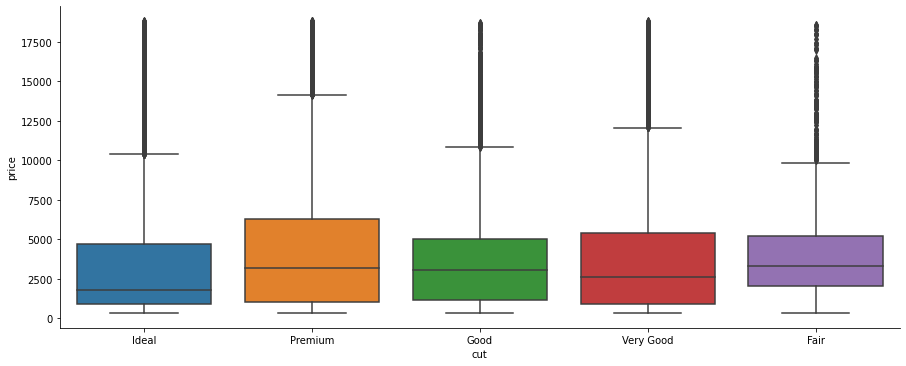

In [19]:
p = sns.factorplot(x='cut',y='price',data=diamond_df , kind='box',aspect=2.5 )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


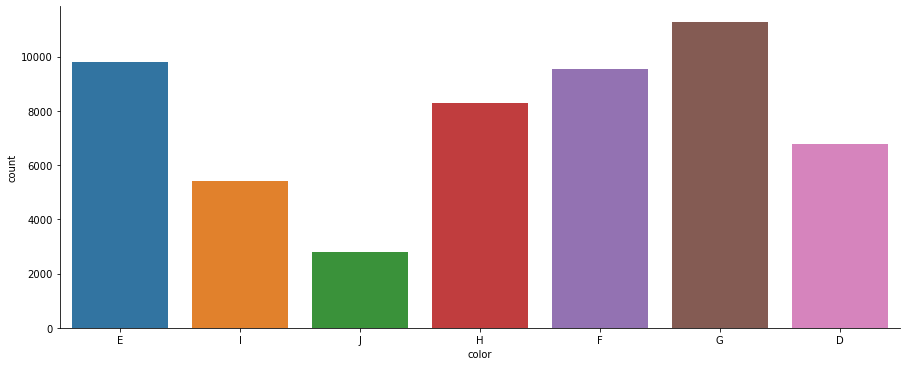

In [20]:
p = sns.factorplot(x='color', data=diamond_df , kind='count',aspect=2.5 )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


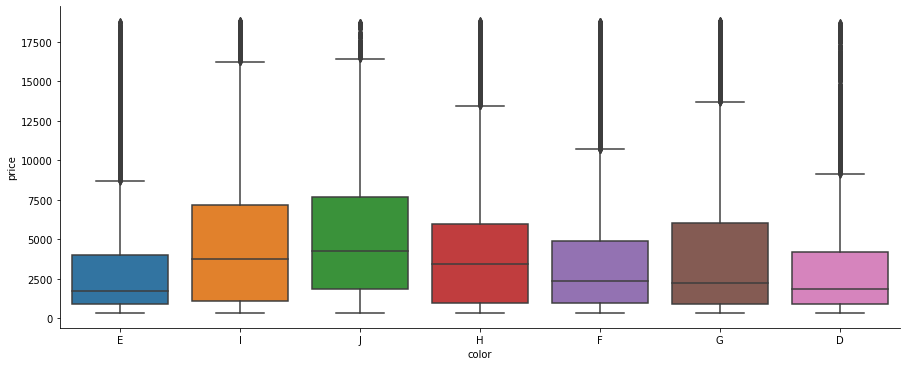

In [21]:
p = sns.factorplot(x='color', y='price', data=diamond_df, kind='box' ,aspect=2.5 )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


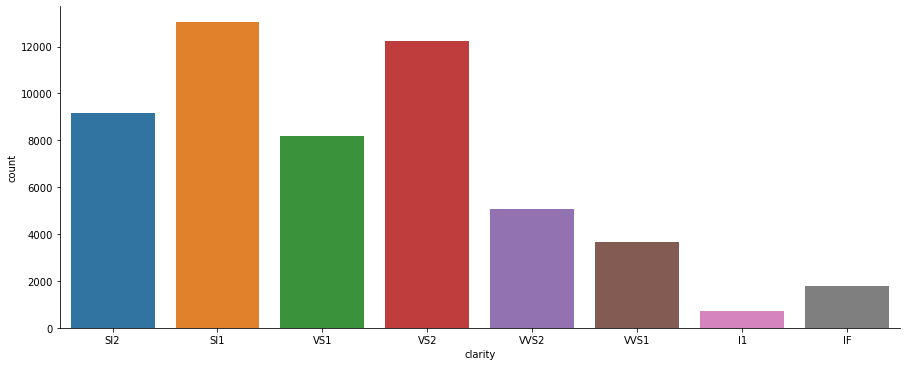

In [22]:
p = sns.factorplot(x='clarity', data=diamond_df , kind='count',aspect=2.5 )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


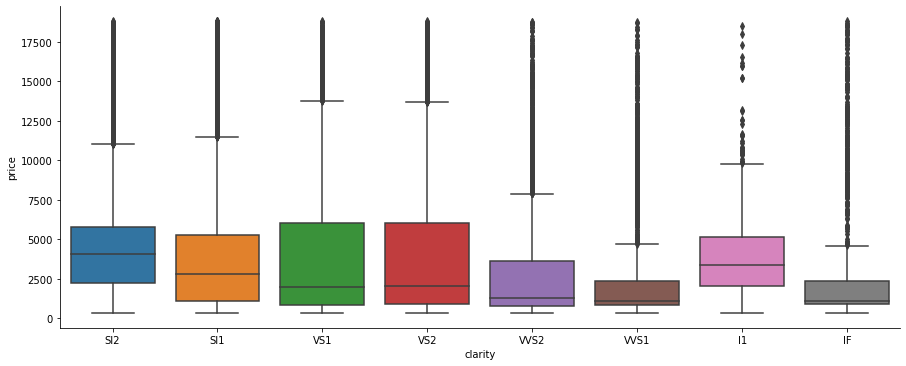

In [23]:
p = sns.factorplot(x='clarity', y='price', data=diamond_df, kind='box' ,aspect=2.5)

Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

In [24]:
diamond_clean_data_ =  pd.get_dummies(diamond_df,drop_first=True)
diamond_clean_data_.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [25]:
X=diamond_clean_data_.drop('price',axis=1)
Y=diamond_clean_data_['price']

In [26]:
numerical_col=X.select_dtypes(include=['int64','float64'])
numerical_col

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =pd.DataFrame(sc_X.fit_transform(numerical_col),columns=['carat','depth','x','y','z','table'],index=numerical_col.index)

In [28]:
numericals

,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583
...,...,...,...,...,...,...
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622


In [29]:
cat_col=X.select_dtypes(include='uint8')
cat_col

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [30]:
Scaled_df=pd.concat([numericals,cat_col],axis=1)
Scaled_df

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [31]:
Scaled_df=pd.concat([Scaled_df,Y],axis=1)

In [32]:
Scaled_df

,carat,depth,x,y,z,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,0,1,0,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,1,0,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,0,0,1,0,...,1,0,0,0,0,0,1,0,0,334
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,1,0,0,0,...,0,1,0,0,1,0,0,0,0,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.163993,-0.662921,-0.204488,0.016413,0.022027,-0.057004,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2757
53936,-0.163993,0.942868,-1.099725,-0.037186,0.013256,0.099575,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2757
53937,-0.206205,0.733417,1.138369,-0.063986,-0.048142,0.028403,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2757
53938,0.131496,-0.523288,0.243131,0.373744,0.337784,0.284622,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2757


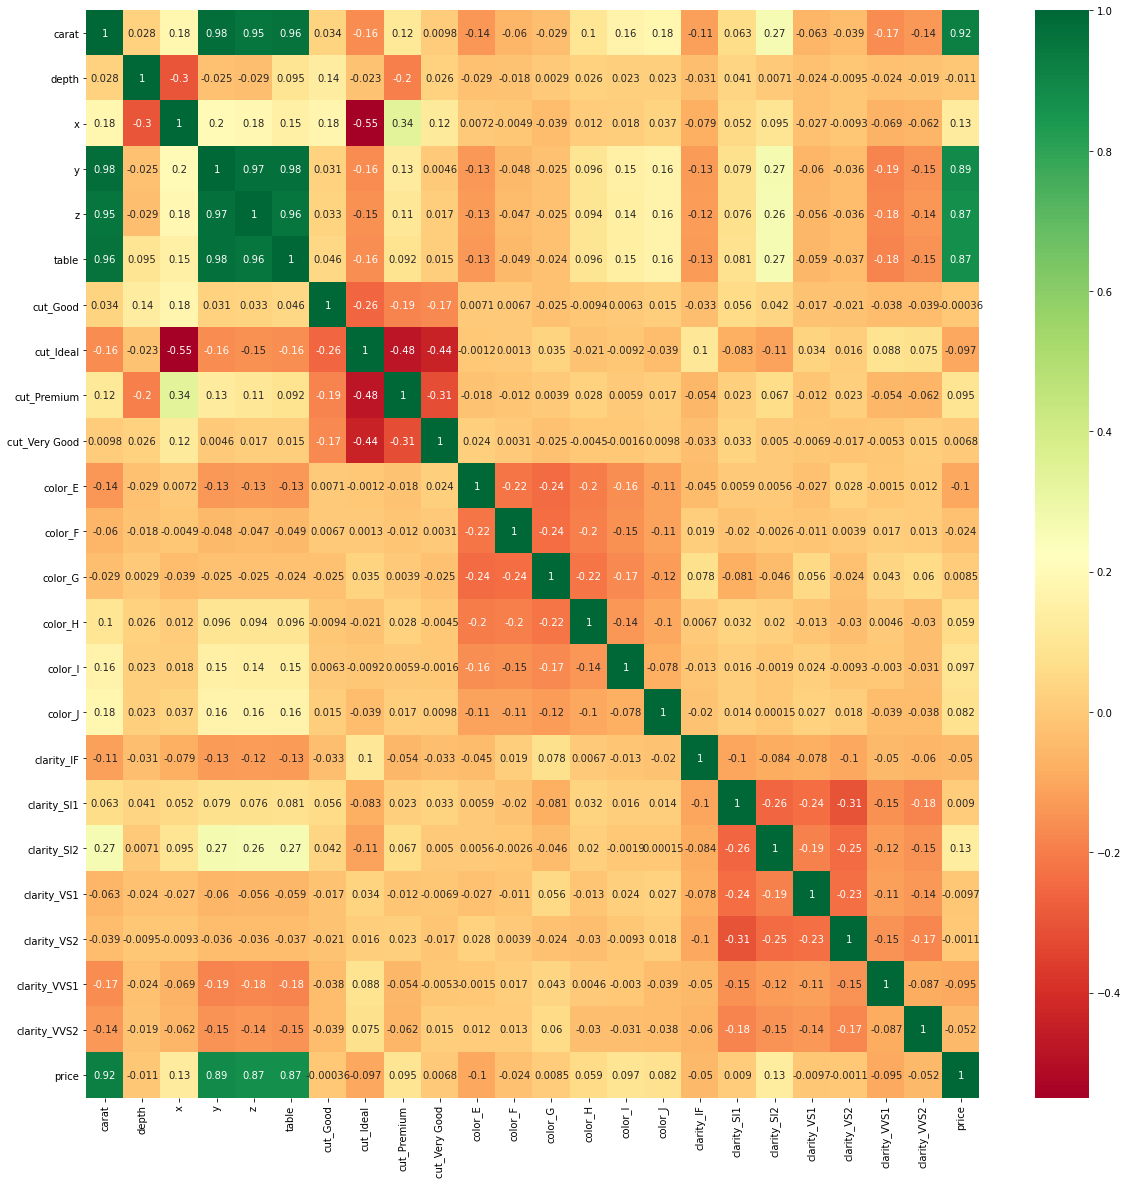

In [33]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(Scaled_df.corr(), annot=True,cmap='RdYlGn')  # seaborn has very simple solution for heatmap

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 2,test_size=0.3)

In [35]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((37744, 23), (16176, 23), (37744,), (16176,))

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21078518476793%
Mean absolute error: 731.4415989248861
Mean squared error: 1222201.2240709334
R Squared: 0.9221078518476793
Adjusted R Squared: 0.9220017646032448


In [37]:
rig_reg = linear_model.Ridge()
rig_reg.fit(train_x,train_y)
y_pred = rig_reg.predict(test_x)
print("accuracy: "+ str(rig_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.21115261121724%
Mean absolute error: 731.3004279589456
Mean squared error: 1222143.5713977464
R Squared: 0.9221115261121725
Adjusted R Squared: 0.9220054438719985


In [38]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 92.19220007685163%
Mean absolute error: 728.1151058684369
Mean squared error: 1225117.4026824634
R Squared: 0.9219220007685163
Adjusted R Squared: 0.9218156603993531
